In [11]:
import bondPricing as bp
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
coupon, price, maturity, freq, max_number_of_loop  = 0.05, 100, [5,7,10], 2, 15

In [17]:
bp.bond_price_from_yield(maturity, yield_guess, coupon, freq)

(array([124.71600275, 134.58511778, 149.37030038]),
 array([ -5.67239728,  -8.282808  , -12.56303982]),
 array([0.30160941, 0.59268174, 1.23591342]))

In [24]:
yield_guess = 100*np.divide(np.add(coupon, np.divide(np.subtract(100,price), maturity)/100), np.add(price, 100)/2)
price_theoretical, delta, _ =  bp.bond_price_from_yield(maturity, yield_guess, coupon, freq)
counter = 0

In [25]:
price_theoretical

array([100., 100., 100.])

In [18]:
yield_guess = 100*np.divide(np.add(coupon, np.divide(np.subtract(100,price), maturity)/100), np.add(price, 100)/2)
price_theoretical, delta, _ =  bp.bond_price_from_yield(maturity, yield_guess, coupon, freq)
counter = 0
# from starting yield, iterate the calculation of the spread using a Newton-Raphson method on the bond price
while counter < max_number_of_loop and np.max(np.abs(np.subtract(price_theoretical, price))) > 1e-6:
    yield_guess = yield_guess + np.divide(np.subtract(price, price_theoretical), delta) / 10_000
    price_theoretical, delta, _ =  bp.bond_price_from_yield(maturity, yield_guess, coupon, freq)
    counter += 1

In [19]:
yield_guess

array([5.00179049, 5.00001196, 5.        ])

## Introduction

The default intensity $\lambda$ is related to the spread and the recovery rate by the relationship: 
$\lambda = \frac{Spread}{1-RecoveryRate}$

The Survival Probability P(t) and Default Probability PD(t) verify by: $ P(t) = 1 - PD(t) = e^{\int_{0}^{t}-\lambda (t) * dt}$

The Discount Factor DF(t) is given by: $ DF(t) = e^{\int_{0}^{t}-r(t) * dt}$

The price of the bond is then the sum of 3 terms:
* The coupon term: $Coupon .\int_{0}^{T}P(t) . DF(t) dt$
* The recovery term: $recoveryRate.\int_{0}^{T}P(t) . DF(t).\lambda (t)dt$
* The notional term: $Notional . P(T) . DF(T)$

Assuming constant spread and interest yields the result: 
$$ Price = \frac{Coupon}{r+\lambda}.(1-e^{-(r+\lambda).T}) + \frac{recoveryRate.\lambda}{r+\lambda}.(1-e^{-(r+\lambda).T}) + Notional . P(T) . DF(T)$$

In [2]:
T = 10
C = 0.05
r = np.linspace(0, 0.2, 50)
spread = 0.01
rr = 0.4

price = 100 * bp.bond_price(maturity=T, coupon=C, interest_rate = r, spread=spread, recovery_rate=rr)
cr01 = bp.bond_cr01(maturity=T, coupon=C, interest_rate = r, spread=spread, recovery_rate=rr)
ir01 = bp.bond_ir01(maturity=T, coupon=C, interest_rate = r, spread=spread, recovery_rate=rr)
cr_gamma = bp.bond_cr01(maturity=T, coupon=C, interest_rate = r, spread=spread, recovery_rate=rr, delta=False)
ir_gamma = bp.bond_ir01(maturity=T, coupon=C, interest_rate = r, spread=spread, recovery_rate=rr, delta=False)

### Bond Price as a function of the interest rate

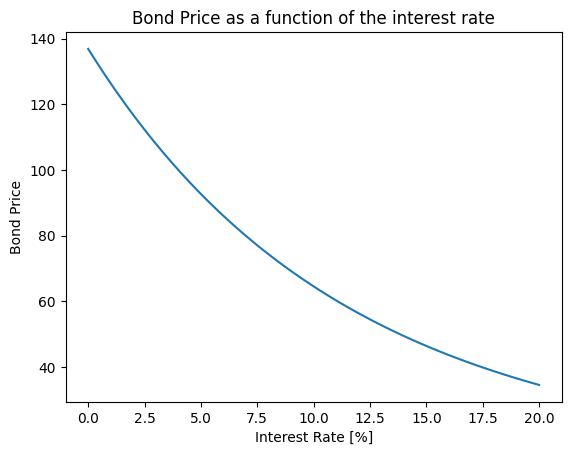

In [3]:
plt.plot(100*r, price)
plt.title("Bond Price as a function of the interest rate")
plt.xlabel("Interest Rate [%]")
plt.ylabel("Bond Price");

## Bond sensitivities as a function of interest rate

$\ 1^{st}$ and $\ 2^{nd}$ order sensitivities are obtained using [finite difference method](https://en.wikipedia.org/wiki/Finite_difference_method)

### Bond CR01 (CR Delta) and IR01 (IR Delta)

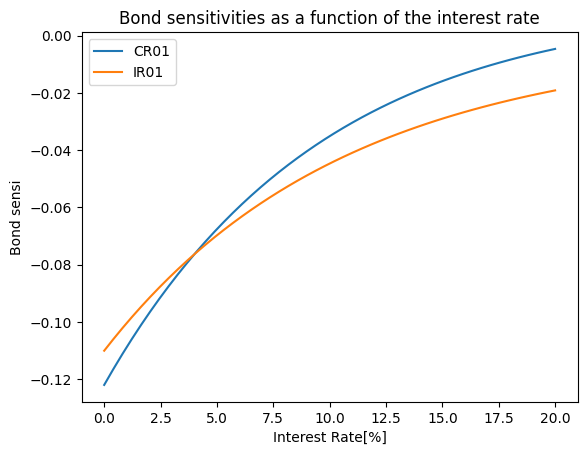

In [4]:
plt.plot(100*r, cr01, label="CR01")
plt.plot(100*r, ir01, label="IR01")
plt.title("Bond sensitivities as a function of the interest rate")
plt.xlabel("Interest Rate[%]")
plt.ylabel("Bond sensi")
plt.legend();

### Bond CR Gamma and IR Gamma

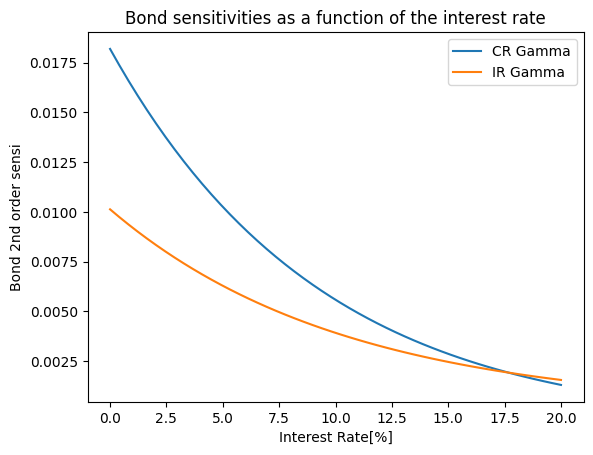

In [5]:
plt.plot(100*r, cr_gamma, label="CR Gamma")
plt.plot(100*r, ir_gamma, label="IR Gamma")
plt.title("Bond sensitivities as a function of the interest rate")
plt.xlabel("Interest Rate[%]")
plt.ylabel("Bond 2nd order sensi")
plt.legend();

## Imply credit spread from bond price

Credit spreads are implied using the bond_price function and a vectorized [Newton-Raphson](https://en.wikipedia.org/wiki/Newton%27s_method) method.

In [6]:
rr_array = np.linspace(0, 0.6, 30)
spread_95 = bp.bond_spread(maturity= T,coupon=C,interest_rate=C,price=95,recovery_rate=rr_array)
spread_75 = bp.bond_spread(maturity= T,coupon=C,interest_rate=C,price=75,recovery_rate=rr_array)


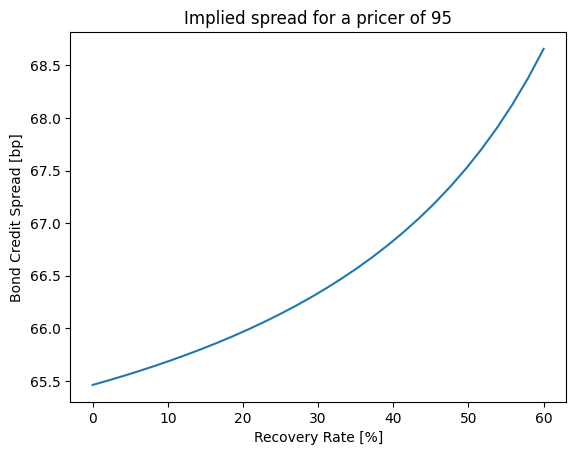

In [7]:
plt.plot(100*rr_array, 10_000 * spread_95)
plt.title("Implied spread for a pricer of 95")
plt.xlabel("Recovery Rate [%]")
plt.ylabel("Bond Credit Spread [bp]");

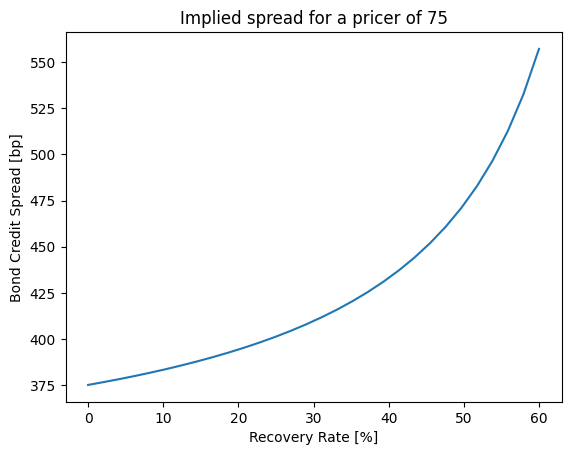

In [8]:
plt.plot(100*rr_array, 10_000 * spread_75)
plt.title("Implied spread for a pricer of 75")
plt.xlabel("Recovery Rate [%]")
plt.ylabel("Bond Credit Spread [bp]");